# 情感分析-初级

[参考网址在这里](https://www.jianshu.com/p/d50a14541d01)

首先，需要安装情感分析的运行环境，也就是一些必要的程序包
+ 在anaconda prompt里面运行

## 英文

In [1]:
# 英文调出TextBlob NLP处理包

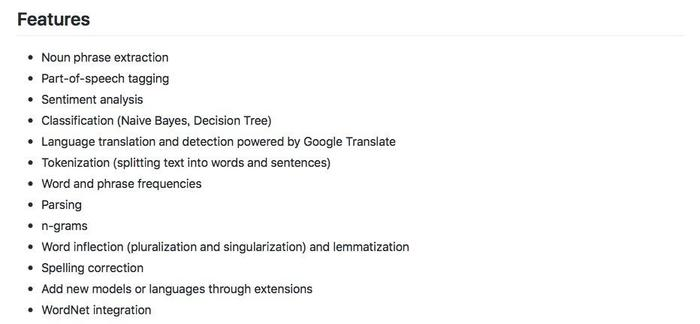

In [1]:
text = "I am happy today. I feel sad today."

In [2]:
from textblob import TextBlob
blob = TextBlob(text)

In [3]:
blob

TextBlob("I am happy today. I feel sad today.")

In [7]:
# 原封不动的打印出来了？
# 实际上已经把文本分成了句子了，看一看
blob.sentences

[Sentence("I am happy today."), Sentence("I feel sad today.")]

In [8]:
blob.sentences[0].sentiment

Sentiment(polarity=0.8, subjectivity=1.0)

In [9]:
# 上面的结果什么意思呢？
# 情感极性0.8，主观性1.0。说明一下，情感极性的变化范围是[-1, 1]，-1代表完全负面，1代表完全正面。
# 我表达的是我很高兴，那么这个结果是对的

In [10]:
blob.sentences[1].sentiment

Sentiment(polarity=-0.5, subjectivity=1.0)

In [11]:
# 整段文本的情感呢？
blob.sentiment

Sentiment(polarity=0.15000000000000002, subjectivity=1.0)

In [12]:
# 你可能会觉得没有道理。怎么一句“高兴”，一句“沮丧”，合并起来最后会得到正向结果呢？
# 首先不同极性的词，在数值上是有区别的。我们应该可以找到比“沮丧”更为负面的词汇。而且这也符合逻辑，谁会这么“天上一脚，地下一脚”矛盾地描述自己此时的心情呢？

##  中文

In [13]:
# 中文分析，用的是SnowNLP包

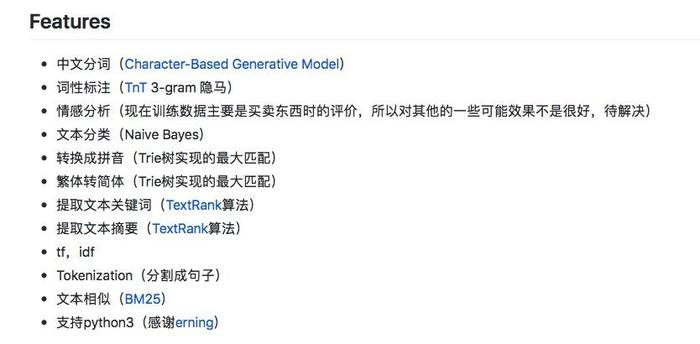

In [15]:
text_cn = u"我今天很快乐。我今天很愤怒。"

In [16]:
#注意在引号前面我们加了一个字母u，它很重要。因为它提示Python，“这一段我们输入的文本编码格式是Unicode，别搞错了哦”。至于文本编码格式的细节，有机会我们再详细聊。

In [20]:
from snownlp import SnowNLP

In [21]:
senti_cn = SnowNLP(text_cn)

In [22]:
# 看看snownlp包的分句能力
for sentence in senti_cn.sentences:
    print(sentence)

我今天很快乐
我今天很愤怒


In [24]:
senti_cn_1 = SnowNLP(senti_cn.sentences[0])

In [25]:
# 一个细节上的问题，英文是x.sentiment,中文是x.sentiments，多了一个s
# 另外，在句法上和英文的也略有不同，比如直接用语句：senti_cn.sentences[0].sentiments是会报错的
senti_cn_1.sentiments

0.971889316039116

In [26]:
senti_cn_2 = SnowNLP(senti_cn.sentences[1])

In [27]:
senti_cn_2.sentiments

0.07763913772213482

这里你肯定发现了问题——“愤怒”这个词表达了如此强烈的负面情感，为何得分依然是正的？

这是因为SnowNLP和textblob的计分方法不同。SnowNLP的情感分析取值，表达的是“这句话代表正面情感的概率”。也就是说，对“我今天很愤怒”一句，SnowNLP认为，它表达正面情感的概率很低很低。

这样解释就是ok了

In [28]:
senti_cn.sentiments

0.7237619924203508

In [29]:
# 整个句子，貌似就有问题了

## 作业

注：设计课程的时候，可以把作业单独拿出来，放在另外一个文档中

从淘宝或者其他平台上找一些评论的句子来试一试，它的情感值是多少。

In [34]:
# 例如
text_taobao_1 = "显示效果: 挺好的 运行速度: 目前来说很流畅 拍照效果: 拍照效果挺好的 电池续航: 一天一冲 总结: 目前没啥毛病，用了一天的体验"

In [35]:
taobao_1 = SnowNLP(text_taobao_1)

In [36]:
taobao_1.sentiments

0.999947261146611

In [37]:
text_taobao_2 = "总结: 这是我买过最不满意的一款手机！两千多元的手机这样，真的很不值！"

In [38]:
taobao_2 = SnowNLP(text_taobao_2)

In [39]:
for sentence in taobao_2.sentences:
    print(sentence)

总结: 这是我买过最不满意的一款手机
两千多元的手机这样
真的很不值


In [40]:
taobao_2.sentiments

0.889005139666256

In [41]:
# 以上的结果看上去是有问题的。分析的不准确。

In [42]:
text_taobao_3 = "显示效果: 像素不行 运行速度: 微信有时发给不了语音，得重新开机后才能发，才买半个月的手机就这样，客服态度也很差！ 拍照效果: 拍照不清晰！ 电池续航: 手机不蓄电，充满电后用半天就没电了，一天得充两次电！！ 总结: 这是我买过最不满意的一款手机！两千多元的手机这样，真的很不值！"

In [43]:
taobao_3 = SnowNLP(text_taobao_3)

In [44]:
taobao_3.sentiments

5.7076094222563434e-05

In [35]:
# 这一长句的结果还是可以的，非常小的概率值了

In [36]:
# 你的例句呢？

In [53]:
# 例句1

In [54]:
# 例句2

In [37]:
# 查看原博客的地址，了解下有时候分析结果不准确的原因。